**Human activity recognition with smartphones**

**Step 1: Data collection.** 

**From:** https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones/

**Step 2: Data exploration**

**Loading data into python**

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/'MyDrive'
%ls

Mounted at /content/drive
/content/drive/MyDrive
'Colab Notebooks'/        'Machine Learning'/
 Colloquium1/             'ML project.gslides'
'Colloquium 2'/           'ML Project Report.gdoc'
'Computing and Society'/  'Principles of Software development'/
 Databases/                testing_data.csv
 DevOps/                   training_data.csv
 Docs/                    'Untitled document.gdoc'
 final_practice.csv


In [2]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Dropout
from tensorflow import keras
from tensorflow.keras import layers

train_df = pd.read_csv('training_data.csv')
test_df = pd.read_csv('testing_data.csv')

The data is collected from 30 users split into training and testing sets by the UCI for Human activity recognition using smartphones.

**Reporting the number of data samples, the number of features.**

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [4]:
train_df.tail()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,0.029369,-0.076700,0.273480,0.186626,0.266917,0.000698,-0.674986,-0.788077,-0.473463,-0.501092,-0.166197,0.034015,0.195643,0.140158,-0.082077,-0.561607,0.426433,-0.078255,-0.056751,-0.094106,0.099141,-0.119821,0.293112,-0.425386,0.267986,-0.205315,0.142117,-0.211822,-0.251582,-0.283335,...,0.354983,-0.904762,-0.066650,-0.076714,-0.426588,-0.332753,-0.129727,-0.128549,-0.251258,-0.995117,-0.332753,-0.605727,-0.292601,0.577573,-0.897436,-0.376234,-0.170845,-0.551898,-0.681097,-0.723951,-0.647418,-0.799450,-0.925241,-0.681097,-0.951092,-0.599074,0.310836,-0.904762,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,0.029369,-0.031966,0.282174,0.202880,0.266917,-0.041310,-0.706359,-0.804546,-0.495789,-0.520057,-0.279863,0.026565,0.178138,0.293566,-0.051532,-0.361660,0.149854,0.206839,-0.154722,0.032725,-0.057240,0.034260,0.239835,-0.364480,0.121335,0.188717,-0.207505,-0.198555,-0.225866,-0.274504,...,0.361739,-0.904762,-0.193946,-0.151879,-0.509448,-0.357992,-0.187114,-0.210320,-0.131733,-0.916112,-0.357992,-0.649987,-0.427577,0.620646,-0.846154,-0.296176,0.019626,-0.277183,-0.682756,-0.771183,-0.727039,-0.779350,-0.761880,-0.682756,-0.957032,-0.670062,0.207930,-0.904762,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,-0.110405,0.055411,0.263175,0.202880,0.264670,0.008034,-0.693162,-0.844279,-0.271194,-0.488620,-0.250723,0.334376,0.173131,0.276040,0.152003,-0.376773,0.200784,0.063584,-0.017019,-0.004323,-0.023053,0.119962,0.080689,-0.420093,0.197763,-0.033780,0.016677,-0.226826,-0.184700,-0.198452,...,0.189903,-0.904762,0.007099,0.331457,0.083984,-0.351948,-0.032290,-0.193130,0.167388,-0.972099,-0.351948,-0.545002,-0.241789,0.5

The training data has 561 Features, 1 Subject (i.e., the person who gave the data for training the machine learning model) and 1 output variable i.e., Activity

In [5]:
train_df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,-0.306043,-0.557121,0.523551,0.387386,0.594374,-0.547569,-0.820041,-0.901874,-0.845784,-0.684345,-0.643770,-0.631069,-0.102993,-0.137937,-0.163946,-0.116599,0.102762,-0.037786,0.130477,-0.026229,0.026322,0.159966,-0.019575,0.009420,0.033291,0.036587,-0.078640,-0.125131,-0.193802,0.105005,...,-0.678618,-0.347657,-0.877995,0.178195,-0.312968,-0.615441,-0.693210,-0.692876,-0.674830,-0.726645,-0.885103,-0.693210,-0.874292,-0.719795,-0.087878,-0.889442,-0.046516,-0.253649,-0.565425,-0.779376,-0.792391,-0.772836,-0.811409,-0.871927,-0.779376,-0.935785,-0.771497,-0.284627,-0.898859,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,0.282243,0.293867,0.363594,0.343611,0.297818,0.471808,0.259607,0.126333,0.221983,0.371608,0.371581,0.386569,0.468959,0.437268,0.371363,0.306507,0.246593,0.243635,0.230067,0.257383,0.215001,0.208837,0.221432,0.

All the data values of the features are between -1 to 1, therefore there are no outliers.

In [6]:
train_df.dtypes.value_counts()

float64    561
object       1
int64        1
dtype: int64

In [7]:
train_df.Activity.value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [8]:
train_df.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [9]:
train_df['Activity'].value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

**Data Visualization**

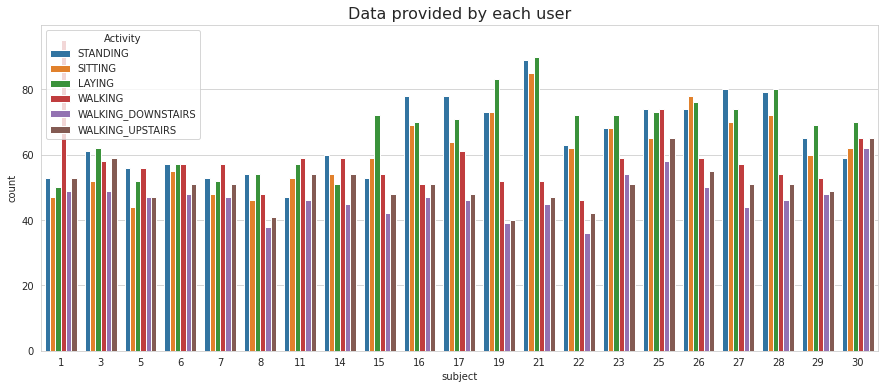

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(15,6))
plt.title('Data provided by each user', fontsize=16)
sns.countplot(x='subject',hue='Activity', data = train_df)
plt.show()

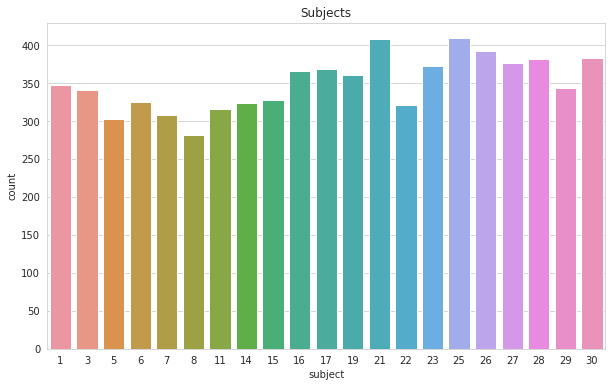

In [11]:
plt.figure(figsize = (10,6))
plt.title('Subjects')
sns.countplot(x = 'subject', data = train_df);

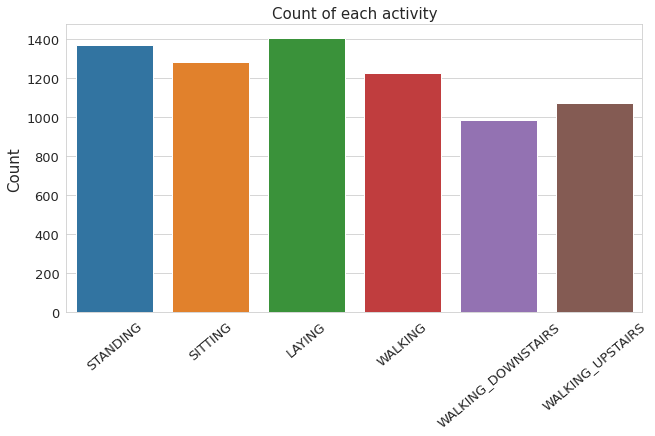

In [12]:
fig = plt.figure(figsize = (8, 4))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each activity", fontsize = 15)
plt.tick_params(labelsize = 10)
sns.countplot(x = "Activity", data = train_df)
plt.xlabel("")
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 13)
plt.xticks(rotation = 40)
plt.show()

**Data normalization and inspecting the data for null values, duplicate values and missing values.**

In [13]:
train_df.Activity.value_counts(normalize=True)

LAYING                0.191376
STANDING              0.186888
SITTING               0.174918
WALKING               0.166757
WALKING_UPSTAIRS      0.145947
WALKING_DOWNSTAIRS    0.134113
Name: Activity, dtype: float64

In [14]:
train_df.duplicated().sum()
test_df.duplicated().sum()

0

No dulplicate values.

In [15]:
train_df.isnull().sum().values.sum()
test_df.isnull().sum().values.sum()

0

No null values

We will remove brackets,hypens, and commas in all the features, so that it will be easy to understand and use them in further analysis.

In [16]:
cols = train_df.columns
cols = cols.str.replace('[()]','')
cols = cols.str.replace('[-]','')
cols = cols.str.replace('[,]','')

In [17]:
train_df.columns = cols
test_df.columns = cols

**Visualizing the activities using Box-plot**

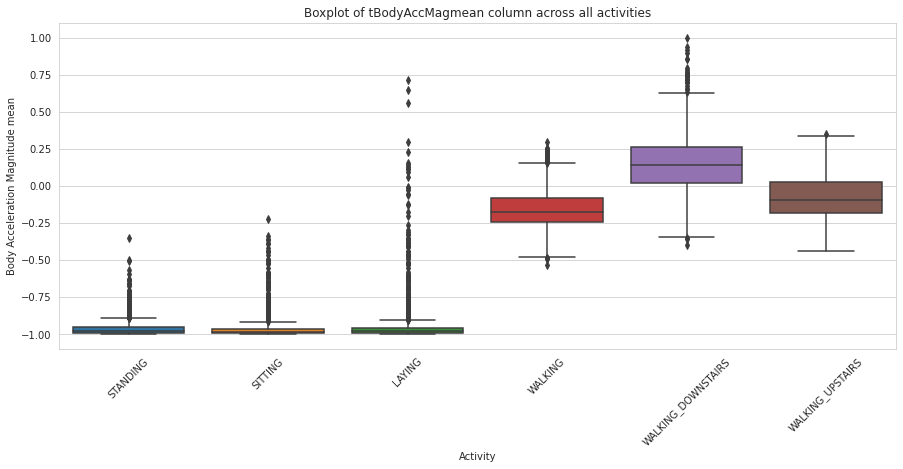

In [18]:
plt.figure(figsize = (15,6))
sns.boxplot(x = 'Activity', y ='tBodyAccMagmean', data = train_df);
plt.ylabel('Body Acceleration Magnitude mean')
plt.title('Boxplot of tBodyAccMagmean column across all activities')
plt.xticks(rotation = 45)
plt.show()

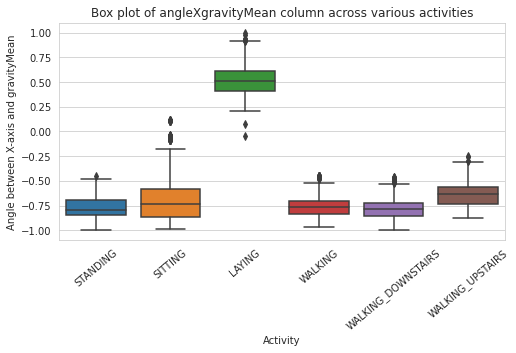

In [19]:
plt.figure(figsize = (8,4))
sns.boxplot(x = 'Activity', y = 'angleXgravityMean', data = train_df)
plt.ylabel("Angle between X-axis and gravityMean")
plt.title("Box plot of angleXgravityMean column across various activities")
plt.xticks(rotation = 40)
plt.show()

From the box-plot it is clear that stationary activities like STANDING,SITTING and LAYING are separate from moving activities like WALKING, WALKING_DOWNSTAIRS and WALKING_UPSTAIRS.

**Perform Label encoding on both training and testing data**

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_df['Activity'] = le.fit_transform(train_df['Activity'])
train_df['Activity'].value_counts()

0    1407
2    1374
1    1286
3    1226
5    1073
4     986
Name: Activity, dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test_df['Activity'] = le.fit_transform(test_df['Activity'])
test_df['Activity'].value_counts()

0    537
2    532
3    496
1    491
5    471
4    420
Name: Activity, dtype: int64

**Splitting the data**

In [22]:
X_train = train_df.drop(['subject','Activity'], axis = 1)
y_train = train_df.Activity
X_test = test_df.drop(['subject','Activity'], axis = 1)
y_test = test_df.Activity

In [23]:
print("Training data shape", X_train.shape)
print("Testing data shape", X_test.shape)
print("y_train matrix shape", y_train.shape)
print("y_test matrix shape", y_test.shape)

Training data shape (7352, 561)
Testing data shape (2947, 561)
y_train matrix shape (7352,)
y_test matrix shape (2947,)


**Logistic Regression**

In [24]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(penalty = 'l2', C = 1, random_state = 0,max_iter=6000)
logistic_model.fit(X_train,y_train)
logistic_model.predict(X_test)

array([2, 2, 2, ..., 5, 5, 5])

In [ ]:
from sklearn.metrics import confusion_matrix
logistic_pred = logistic_model.predict(X_test)
conf_mat = confusion_matrix(y_test.values, logistic_pred)
conf_mat

array([[537,   0,   0,   0,   0,   0],
       [  0, 432,  56,   0,   0,   3],
       [  0,  11, 520,   1,   0,   0],
       [  0,   0,   0, 493,   3,   0],
       [  0,   0,   0,   3, 406,  11],
       [  0,   0,   0,  25,   1, 445]])

In [ ]:
from sklearn.metrics import accuracy_score
print('accuracy of the data:', accuracy_score(y_test, logistic_pred))

accuracy of the data: 0.9613165931455717


In [ ]:
from operator import truediv
import numpy as np

tp = np.diag(conf_mat)
prec = list(map(truediv, tp, np.sum(conf_mat, axis=0)))
rec = list(map(truediv, tp, np.sum(conf_mat, axis=1)))
print ('Precision: {}\nRecall: {}'.format(prec, rec))

Precision: [1.0, 0.9751693002257337, 0.9027777777777778, 0.9444444444444444, 0.9902439024390244, 0.9694989106753813]
Recall: [1.0, 0.879837067209776, 0.9774436090225563, 0.9939516129032258, 0.9666666666666667, 0.9447983014861996]


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train,y_train)
knn_model.predict(X_test)

array([2, 2, 2, ..., 5, 5, 3])

In [ ]:
from sklearn.metrics import confusion_matrix
knn_pred = knn_model.predict(X_test)
knn_conf_mat = confusion_matrix(y_test.values, knn_pred)
knn_conf_mat

array([[534,   2,   1,   0,   0,   0],
       [  0, 409,  78,   0,   0,   4],
       [  0,  47, 485,   0,   0,   0],
       [  0,   0,   0, 486,  10,   0],
       [  0,   0,   0,  51, 331,  38],
       [  0,   0,   0,  36,   8, 427]])

In [ ]:
from sklearn.metrics import accuracy_score
print('accuracy of the data:', accuracy_score(y_test, knn_pred))

accuracy of the data: 0.9066847641669494


In [ ]:
from operator import truediv
import numpy as np

tp = np.diag(knn_conf_mat)
prec = list(map(truediv, tp, np.sum(knn_conf_mat, axis=0)))
rec = list(map(truediv, tp, np.sum(knn_conf_mat, axis=1)))
print ('Precision: {}\nRecall: {}'.format(prec, rec))

Precision: [1.0, 0.8930131004366813, 0.8599290780141844, 0.8481675392670157, 0.9484240687679083, 0.9104477611940298]
Recall: [0.994413407821229, 0.8329938900203666, 0.9116541353383458, 0.9798387096774194, 0.7880952380952381, 0.9065817409766455]


**Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(C = 10, gamma = 0.1)
svm_model.fit(X_train,y_train)
svm_model.predict(X_test)

array([2, 2, 2, ..., 5, 5, 5])

In [ ]:
from sklearn.metrics import confusion_matrix
svm_pred = svm_model.predict(X_test)
svm_conf_mat = confusion_matrix(y_test.values, svm_pred)
svm_conf_mat

array([[534,   0,   0,   0,   3,   0],
       [  1, 452,  31,   0,   7,   0],
       [  0,  14, 515,   0,   3,   0],
       [  0,   0,   0, 468,  28,   0],
       [  0,   0,   0,   6, 388,  26],
       [  0,   0,   0,   6,   5, 460]])

In [ ]:
from sklearn.metrics import accuracy_score
print('accuracy of the data:', accuracy_score(y_test, svm_pred))

accuracy of the data: 0.9558873430607397


In [ ]:
from operator import truediv
import numpy as np

tp = np.diag(svm_conf_mat)
prec = list(map(truediv, tp, np.sum(svm_conf_mat, axis=0)))
rec = list(map(truediv, tp, np.sum(svm_conf_mat, axis=1)))
print ('Precision: {}\nRecall: {}'.format(prec, rec))

Precision: [0.9981308411214953, 0.9699570815450643, 0.9432234432234432, 0.975, 0.8940092165898618, 0.9465020576131687]
Recall: [0.994413407821229, 0.9205702647657841, 0.9680451127819549, 0.9435483870967742, 0.9238095238095239, 0.9766454352441614]


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train,y_train)
random_forest_model.predict(X_test)

array([2, 2, 2, ..., 5, 5, 3])

In [ ]:
from sklearn.metrics import confusion_matrix
rf_pred = random_forest_model.predict(X_test)
rf_conf_mat = confusion_matrix(y_test.values, rf_pred)
rf_conf_mat

array([[537,   0,   0,   0,   0,   0],
       [  0, 435,  56,   0,   0,   0],
       [  0,  41, 491,   0,   0,   0],
       [  0,   0,   0, 482,   6,   8],
       [  0,   0,   0,  15, 365,  40],
       [  0,   0,   0,  46,   6, 419]])

In [ ]:
from sklearn.metrics import accuracy_score
print('accuracy of the data:', accuracy_score(y_test, rf_pred))

accuracy of the data: 0.9260264675941635


In [ ]:
from operator import truediv
import numpy as np

tp = np.diag(rf_conf_mat)
prec = list(map(truediv, tp, np.sum(rf_conf_mat, axis=0)))
rec = list(map(truediv, tp, np.sum(rf_conf_mat, axis=1)))
print ('Precision: {}\nRecall: {}'.format(prec, rec))

Precision: [1.0, 0.9138655462184874, 0.8976234003656307, 0.8876611418047882, 0.9681697612732095, 0.8972162740899358]
Recall: [1.0, 0.8859470468431772, 0.9229323308270677, 0.9717741935483871, 0.8690476190476191, 0.8895966029723992]


**Decision Trees**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train,y_train)
decision_tree_model.predict(X_test)

array([2, 2, 2, ..., 5, 3, 5])

In [ ]:
from sklearn.metrics import confusion_matrix
tree_pred = decision_tree_model.predict(X_test)
tree_conf_mat = confusion_matrix(y_test.values, tree_pred)
tree_conf_mat

array([[537,   0,   0,   0,   0,   0],
       [  0, 374, 117,   0,   0,   0],
       [  0,  75, 457,   0,   0,   0],
       [  0,   0,   0, 456,  16,  24],
       [  0,   0,   0,  19, 348,  53],
       [  0,   0,   0,  74,  28, 369]])

In [ ]:
from sklearn.metrics import accuracy_score
print('accuracy of the data:', accuracy_score(y_test, tree_pred))

accuracy of the data: 0.8622327790973872


In [ ]:
from operator import truediv
import numpy as np

tp = np.diag(tree_conf_mat)
prec = list(map(truediv, tp, np.sum(tree_conf_mat, axis=0)))
rec = list(map(truediv, tp, np.sum(tree_conf_mat, axis=1)))
print ('Precision: {}\nRecall: {}'.format(prec, rec))

Precision: [1.0, 0.8329621380846325, 0.7961672473867596, 0.8306010928961749, 0.8877551020408163, 0.827354260089686]
Recall: [1.0, 0.7617107942973523, 0.8590225563909775, 0.9193548387096774, 0.8285714285714286, 0.7834394904458599]


**Neural Network**

In [ ]:
def build_neuralnet_classifier():
  model = Sequential()
  model.add(Dense(units=56,kernel_initializer='normal',activation='sigmoid',input_dim=X_train.shape[1]))
  model.add(Dropout(0.2))
  model.add(Dense(units=6,kernel_initializer='normal',activation='softmax'))
  model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return model

nn_model = build_neuralnet_classifier()
nn_model.fit(X_train, y_train, batch_size = 56, epochs= 50,validation_data = (X_test,y_test))

Epoch 1/50
132/132 [==============================] - 1s 6ms/step - loss: 1.2321 - accuracy: 0.5532 - val_loss: 0.9125 - val_accuracy: 0.7489
Epoch 2/50
132/132 [==============================] - 0s 3ms/step - loss: 0.7153 - accuracy: 0.8048 - val_loss: 0.5638 - val_accuracy: 0.8561
Epoch 3/50
132/132 [==============================] - 0s 3ms/step - loss: 0.4606 - accuracy: 0.8750 - val_loss: 0.4132 - val_accuracy: 0.8595
Epoch 4/50
132/132 [==============================] - 0s 4ms/step - loss: 0.3500 - accuracy: 0.9021 - val_loss: 0.3302 - val_accuracy: 0.9158
Epoch 5/50
132/132 [==============================] - 0s 4ms/step - loss: 0.2788 - accuracy: 0.9172 - val_loss: 0.2709 - val_accuracy: 0.9240
Epoch 6/50
132/132 [==============================] - 0s 3ms/step - loss: 0.2286 - accuracy: 0.9361 - val_loss: 0.2506 - val_accuracy: 0.9169
Epoch 7/50
132/132 [==============================] - 0s 3ms/step - loss: 0.1904 - accuracy: 0.9430 - val_loss: 0.2000 - val_accuracy: 0.9447
Epoch 

In [ ]:
nn_predict = (nn_model.predict(X_test) > 0.5).astype(int)
nn_predict

array([[0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1]])

In [ ]:
from sklearn.metrics import confusion_matrix
nn_conf_mat = confusion_matrix(y_test.values, np.argmax(nn_predict,axis=1))
nn_conf_mat

array([[524,   0,  13,   0,   0,   0],
       [  2, 446,  41,   0,   0,   2],
       [  0,  40, 492,   0,   0,   0],
       [  1,   0,   0, 487,   7,   1],
       [  0,   0,   0,   3, 401,  16],
       [  2,   0,   0,  24,   3, 442]])

In [ ]:
from sklearn.metrics import accuracy_score
print('accuracy of the data:', accuracy_score(y_test, np.argmax(nn_predict,axis=1)))

accuracy of the data: 0.9474041398031897


In [ ]:
from operator import truediv
import numpy as np

tp = np.diag(rf_conf_mat)
prec = list(map(truediv, tp, np.sum(rf_conf_mat, axis=0)))
rec = list(map(truediv, tp, np.sum(rf_conf_mat, axis=1)))
print ('Precision: {}\nRecall: {}'.format(prec, rec))

Precision: [1.0, 0.9138655462184874, 0.8976234003656307, 0.8876611418047882, 0.9681697612732095, 0.8972162740899358]
Recall: [1.0, 0.8859470468431772, 0.9229323308270677, 0.9717741935483871, 0.8690476190476191, 0.8895966029723992]


**Feature importance**

In [ ]:
random_forest = RandomForestClassifier(random_state=60)
random_forest.fit(X_train,y_train)
random_forest_importance = random_forest.feature_importances_
print(random_forest_importance)

[2.33653685e-04 2.56692597e-04 7.17407128e-05 3.66693199e-03
 5.01646803e-04 3.30269618e-04 2.32985818e-03 4.84096565e-04
 7.50301403e-04 8.71362919e-03 2.51806295e-04 2.91933468e-04
 3.43023770e-04 5.06051516e-04 2.17345794e-04 4.82384761e-04
 1.03611636e-03 3.63206111e-04 7.11039419e-04 8.72277768e-04
 4.27774343e-04 2.29824752e-04 6.71103411e-04 2.84737333e-04
 2.05322538e-04 2.51417636e-04 1.60352556e-04 1.26077593e-04
 3.72552508e-04 1.72561199e-04 3.02175282e-04 1.44654084e-04
 2.62859990e-04 1.63300394e-04 1.34809784e-04 1.30217394e-04
 1.94737356e-04 7.95981418e-03 8.93105841e-04 4.53864243e-03
 2.97101896e-02 2.02520302e-02 1.70587570e-02 2.49165717e-03
 1.78224445e-03 7.49683558e-04 1.00197272e-03 1.04244775e-03
 7.92562833e-04 2.92087583e-02 2.11122786e-02 1.07337783e-02
 3.24696706e-02 2.68535924e-02 1.15888456e-02 3.74546456e-03
 2.01168245e-02 1.61209408e-02 7.94126831e-03 1.04323522e-03
 5.68390113e-04 1.12507883e-04 3.87333596e-03 6.91839179e-03
 3.53813411e-04 8.503266